In [117]:
import pandas as pd
import numpy as np

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
%matplotlib inline

In [120]:
df=pd.read_csv("titanic_train.csv")

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Checking null values in the dataframe

<AxesSubplot:>

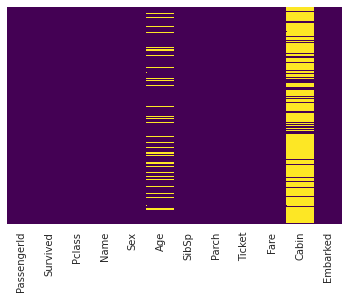

In [122]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap= "viridis")

In [123]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

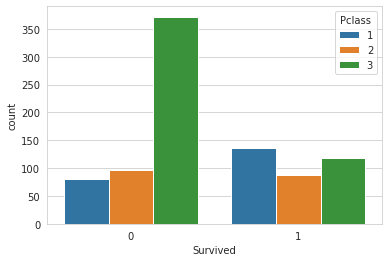

In [124]:
sns.countplot(x="Survived", hue="Pclass", data=df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

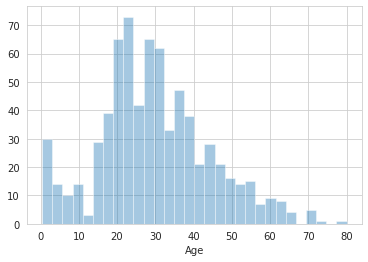

In [125]:
sns.distplot(df["Age"].dropna(), kde= False, bins =30)

<AxesSubplot:ylabel='Frequency'>

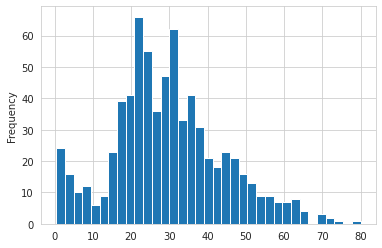

In [126]:
df["Age"].plot.hist(bins=35)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

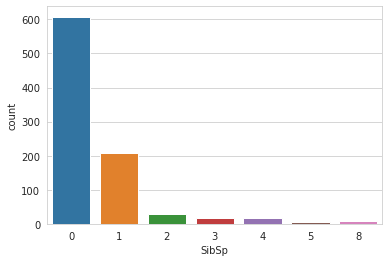

In [128]:
sns.countplot(x="SibSp", data=df)

<AxesSubplot:>

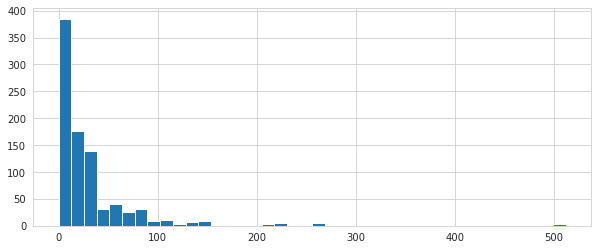

In [129]:
df["Fare"].hist(bins = 40, figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

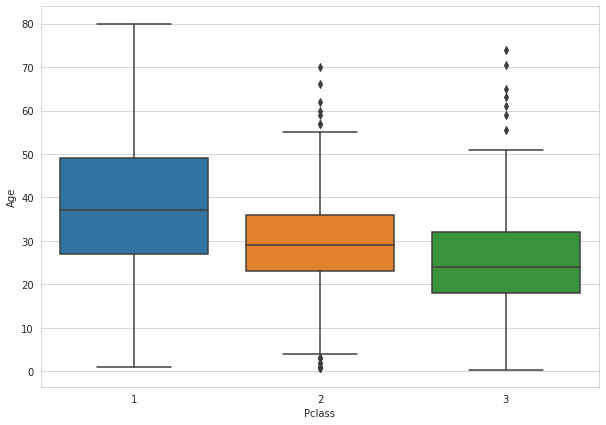

In [130]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=df)

In [131]:
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
            
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age
    

In [132]:
df["Age"]=df[["Age", "Pclass"]].apply(impute_Age, axis=1)

<AxesSubplot:>

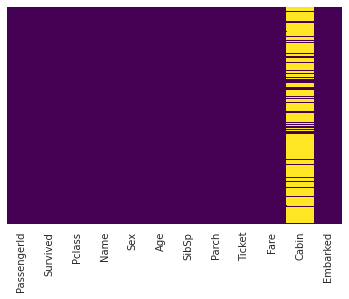

In [133]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap= "viridis")

In [134]:
df.drop("Cabin", axis=1, inplace= True)
df.dropna(inplace=True)

<AxesSubplot:>

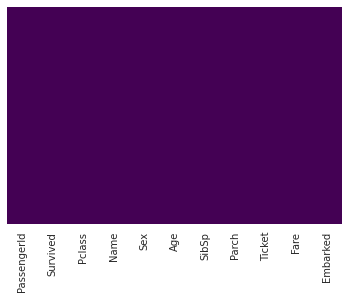

In [135]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap= "viridis")

In [136]:
sex=pd.get_dummies(df["Sex"], drop_first= True)
embark = pd.get_dummies(df["Embarked"], drop_first= True)

In [137]:
df=pd.concat([df, sex, embark], axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [138]:
df.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [139]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [140]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [142]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()

In [143]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
predictions=logmodel.predict(X_test)

In [145]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

[[147  16]
 [ 30  74]]
